<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Betsy Torres | Karla Antón

**Fecha:** 12 noviembre de 2020.

**Expediente** : if714095 | if714572
**Profesor:** Oscar David Jaramillo Zuluaga.

# Proyecto Modulo 1

### 1.1 Titulo del Trabajo

## <span style="background-color: YELLOW"> MUERTES POR SUICIDIO EN MÉXICO

LINK GITHUB: https://github.com/Karlaanton/Proyecto_TorresBetsy_AntonKarla



### 1.2 Objetivos.

**Objetivo general**

> Analizar el aumento de defunciones, especificamente a causa de suicidios, en México.

**Objetivos específicos**

Utilizando las bases de datos de inegi, estos son los puntos de interés:
> - Verificar el comportamiento del índice de mortalidad.
> - simular los comportamientos de los suicidios y como afetan al indice de mortalidad.
> - Simular los comportamientos las edades en las que ocurre más el suicido.
> - Encontrar como los sucidios influyen en la tasa de mortalidad

### 1.3 Definición del problema




### 1.4 Nodos y variables que se decidieron simular 

> - Defunciones
> - Defunciones según accidente
> - Sucidio según sus causas
> - Sucidio según la edad

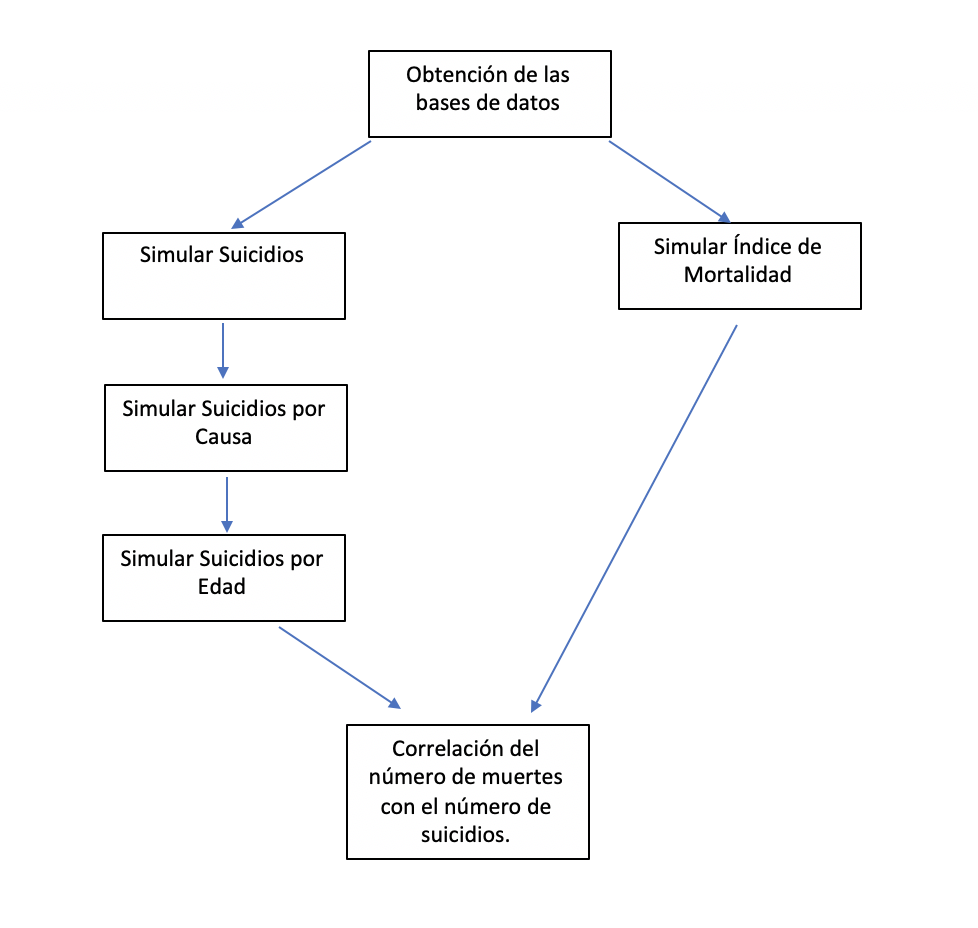


### 1.5 Definición de hipótesis y supuestos.
**Supuestos**
> - Las muertes en México seguirán aumentando 
> - Los datos serán suficientes para resultados concluyentes

**Hipótesis**


### 1.6 Obtención de bases de datos
> Bases de datos obtenidas de <https://www.inegi.org.mx>


# <span style="background-color: red"> NODO SUICIDIOS

In [4]:
suicidios = pd.read_excel('Suicidios_Estados.xlsx', sheet_name='Tabulado', header=None).dropna()
suicidios = suicidios.drop(columns=[2,3,4,6,7,8,10,11,12])
suicidios.columns=['Estados','2017','2018','2019']
suicidios.set_index('Estados', inplace=True)
suicidios['Total'] = suicidios.iloc[:,0:3].sum(axis=1) #total suicidios por estado y total de totales por año
suicidios.head()

,2017,2018,2019,Total
Estados,,,,
Total,6559,6808,7223,20590.0
Aguascalientes,140,140,157,437.0
Baja California,166,194,169,529.0
Baja California Sur,47,57,59,163.0
Campeche,74,69,95,238.0


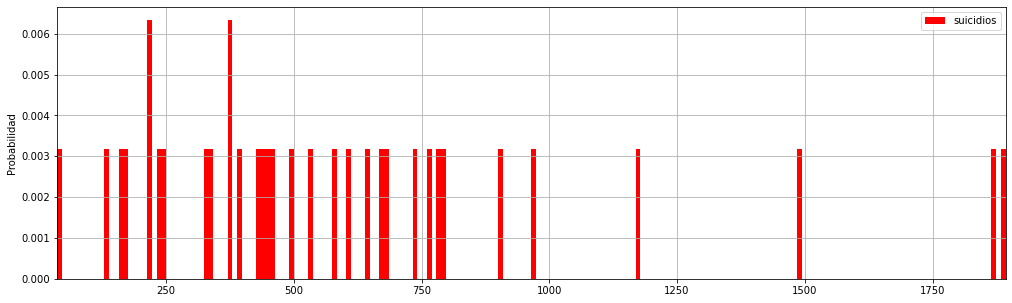

In [5]:
# suic = pd.DataFrame({'Numero muertes': (suicidios['2017'].append(suicidios["2018"]).append(suicidios["2019"]))})
suic=pd.DataFrame({'Num suic': (suicidios.iloc[1:,3])})
list_acc=list(suicidios.iloc[1:,3])
x=list(filter(lambda num: num != 0, list_acc))

bins=200
plt.figure(figsize=(17,5))
plt.hist(x, bins, density= True, label= "suicidios", color='red')
plt.xlim((min(list_acc),max(list_acc)))
plt.legend(loc="best")
plt.ylabel('Probabilidad')
plt.grid()
plt.show()

## DISTRIBUCIÓN PARA SUICIDIOS

In [6]:
# Función para obtener mejor distribución y parámetros

def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    #DISTRIBUTIONS = [st.alpha,st.cauchy,st.cosine,st.laplace,st.levy,st.levy_l,st.norm]
    DISTRIBUTIONS = [        
        st.alpha,st.arcsine,st.beta,st.cauchy,st.chi,st.chi2,st.cosine,st.dweibull,st.erlang,st.expon,st.exponnorm,st.gamma,
        st.laplace, st.logistic,st.maxwell,st.mielke,st.nakagami,st.norm,st.pareto,st.pearson3,st.rdist,st.reciprocal, st.rayleigh,st.rice,
        st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda, st.uniform,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [7]:
dist_suicidios,para_suicidios=best_fit_distribution(suicidios.iloc[1:,3])
dist_suicidios, para_suicidios

('mielke',
 (1.7844705262913387, 2.9769147573574912, -6.420271617620863, 655.43441482225))

Tenemos que el mejor ajuste para nuestros datos es una distribución MIELKE con los parametros dentro de la variable 'para_suicidios'. Pasaremos entonces a comproba la distribución con la prueba de Q-Q.

## PRUEBA QUANTIL QUANTIL

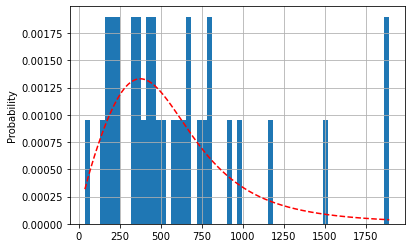

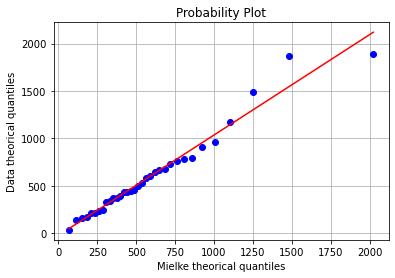

In [8]:
## Parámetros
# para2 = st.beta.fit(data2)
# para2

# Histograma de las variables creadas
divisiones = 60 # Cantidad de barras en el histograma
plt.hist(suicidios.iloc[1:,3],divisiones,density=True)
x = np.arange(min(suicidios.iloc[1:,3]),max(suicidios.iloc[1:,3]),.01)
y = st.mielke.pdf(x,para_suicidios[0], para_suicidios[1], para_suicidios[2], para_suicidios[3])
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

# Gráfica de Q-Q entre las muestras creadas y una curva normal
grap2 = st.probplot(suicidios.iloc[1:,3],(para_suicidios[0],para_suicidios[1], para_suicidios[2], para_suicidios[3]),dist=dist_suicidios, plot=plt)
plt.grid()
plt.xlabel('Mielke theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

## KDE

Empleamos Kernel Density Estimation para seleccionar el bandwidth que mejor se ajuste a nuestros datos. 

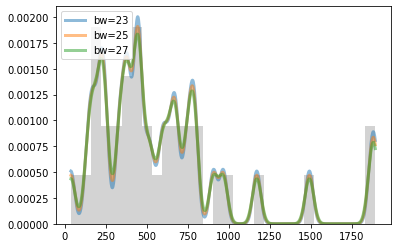

In [9]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

x_grid = np.linspace(min(suicidios.iloc[1:,3]),max(suicidios.iloc[1:,3]), 1000)

fig, ax = plt.subplots()
for bandwidth in [23,25,27]:
    ax.plot(x_grid, kde_sklearn(suicidios.iloc[1:,3], x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.5)
ax.hist(suicidios.iloc[1:,3], 30, fc='lightgray', histtype='stepfilled', alpha=1, density=True)
# ax.set_xlim(-4.5, 3.5)
ax.legend(loc='upper left')

Tomamos el $bw=25$

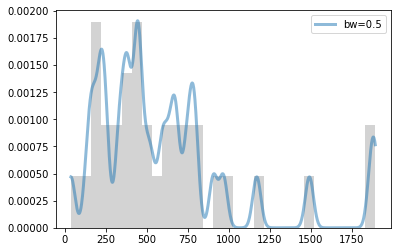

In [10]:
#Variable aleatorias y aceptación y rechazo
fig, ax = plt.subplots()
ax.plot(x_grid, kde_sklearn(suicidios.iloc[1:,3], x_grid, bandwidth=25),
        label='bw=0.5'.format(bandwidth), linewidth=3, alpha=0.5)
ax.hist(suicidios.iloc[1:,3], 30, fc='lightgrey', histtype='stepfilled', alpha=1, density=True)
ax.legend(loc='upper right')
plt.show()

## MÉTODO DE ACEPTACIÓN Y RECHAZO CON KDE

In [11]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    pdf = lambda x: np.exp(kde_skl.score_samples(x[:, np.newaxis]))
    return pdf


# Función objetivo 
x_grid = np.linspace(0, suicidios.iloc[1:,3].max(), 1000) #max data manejada
data_suic = np.asarray(suicidios.iloc[1:,3]) #data 
f = kde_sklearn(data_suic, x_grid, bandwidth=25) # bw data nodo
# Máximo de la función f
max_f = max(f(x))
print('El máximo de f es:',max_f)

El máximo de f es: 0.0019083010843354562


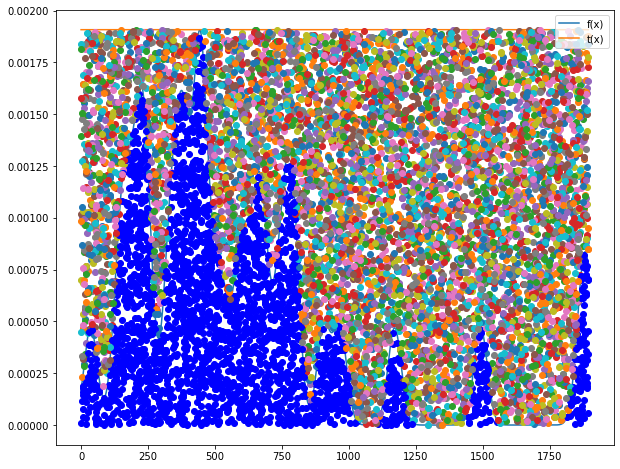

In [12]:
# Función t
t = lambda x: max_f*np.ones(len(x))
x = np.arange(0,suicidios.iloc[1:,3].max(),0.01)  # Rango donde se graficará las funciones
# Gráficas de las funciones
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend(loc='upper right')
# Validación del método
N = 10000 # número de puntos a simular
R2 = np.random.rand(N)
R1 = np.random.uniform(0,suicidios.iloc[1:,3].max(),N) #maximo de todos los tados. 
Acep_rechazo(R2,R1,f,t)

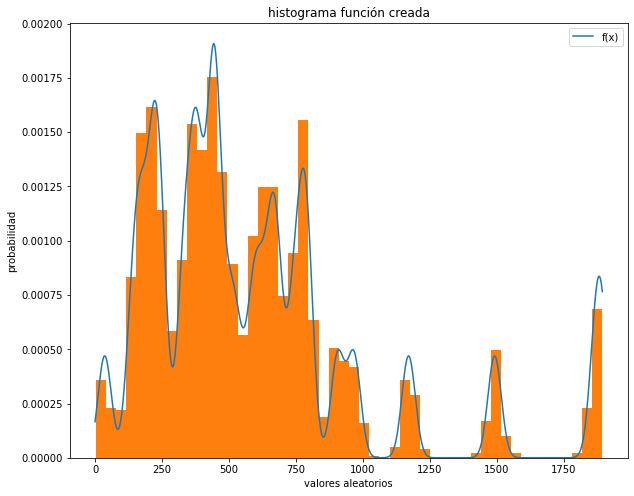

In [13]:
# Ajuste datos kde
# Función objetivo 
f = kde_sklearn(data_suic, x_grid, bandwidth=25) #bw data nodo
x = np.linspace(0,suicidios.iloc[1:,3].max(),1000) # Rango donde se graficará las funciones max data nodo
# Gráfica de la función
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label='f(x)')
plt.legend()

t = lambda x: max_f*np.ones(len(x))
N = 10000
R2 = np.random.rand(N)
R1 = np.random.uniform(0,suicidios.iloc[1:,3].max(),N) #max data nodo
histograma(R2, R1, f, t)

Evidentemente, con las graficas anteriores podemos observar que el $bw=25$ fue es óptimo ya que se ajusta muy bien a nuestros datos

## REDUCCIÓN DE VARIANZA

## CHI CUADRADA

## Prueba chi cuadrada

**Para los datos totales de suicidio**


$H_0$: MIELKE es la distribución de los valores 

$H_a$: MIELKE no es la distribución de los valores 

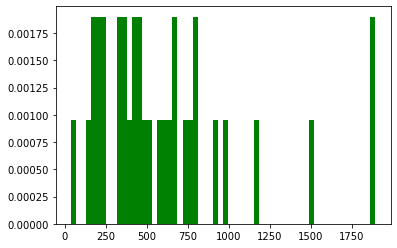

media muestral =949.025000, desviación estándar muestral =535.995266
media real =605.588235, desviación real muestral =447.686587


In [14]:
J = 60  # Cantidad de particiones del histograma
[freqs,xs,p]=plt.hist(suicidios.iloc[1:,3],J,density=True, color='green')
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
xs = xs[:-1] 

# Media y desviación estándar muestral
mus = np.mean(xs)
sigmas = np.std(xs)
print('media muestral =%f, desviación estándar muestral =%f'%(mus,sigmas))
print('media real =%f, desviación real muestral =%f'%(suicidios.iloc[1:,3].mean(),suicidios.iloc[1:,3].std()))

In [15]:
pi = st.mielke.pdf(xs,para_suicidios[0], para_suicidios[1],para_suicidios[2], para_suicidios[3])
# Cálculo de la esperanza usando la expresión teórica
Ei = xs*pi

# Cálculo usando la librería estadística de la chi cuadrada
Xs = st.chisquare(freqs,Ei)
print('Valor de chi cuadrado librería = ',Xs)

# Cálculo de Grados de libertad del estadístico
p = 3 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est2 = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est2)
print('Media muestral = %f \nDesviación estándar muestral =%f '%(mus,sigmas))
print('media real =%f, desviación real muestral =%f'%(suicidios.iloc[1:,3].mean(),suicidios.iloc[1:,3].std()))

Valor de chi cuadrado librería =  Power_divergenceResult(statistic=17.535851383011593, pvalue=0.9999999705295554)
Estadístico de chi_cuadrado =  74.46832415930936
Media muestral = 949.025000 
Desviación estándar muestral =535.995266 
media real =605.588235, desviación real muestral =447.686587


Como podemos observar el $p value>0.05$ por lo tanto se acepta la $H_0$

## PRÓNOSTICO 2021

In [16]:
suic_2021 = st.mielke.mean(para_suicidios[0], para_suicidios[1], para_suicidios[2], para_suicidios[3]).round()
vsuic_2021= st.mielke.std(para_suicidios[0], para_suicidios[1], para_suicidios[2], para_suicidios[3]).round()
print('Suicidios pronosticados en promedio por estado para 2021 = ', suic_2021)


Suicidios pronosticados en promedio por estado para 2021 =  616.0


In [17]:
confianza = 0.95
u = np.random.uniform(suic_2021, vsuic_2021,10000)  
st.sem
ic1 = st.t.interval(confianza,suic_2021-1, loc=suic_2021, scale=st.sem(u))
ic2 = st.norm.interval(confianza, loc=suic_2021, scale=st.sem(u))
print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s' %(confianza,ic1))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,ic2))
print('Media calculada' , suic_2021)

Con una confianza de 0.95 la media estará en el intervalo t,
 (615.7167529353671, 616.2832470646329)
Con una confianza de 0.95 la media estará en el intervalo normal,
 (615.71731036703, 616.28268963297)
Media calculada 616.0


## CONCLUSIÓN NODO 1



El modelo elejido se ajusta muy bien al data set, obteniendo asi resultado semejantes y coherentes a los datos reales dentro de las simulaciones, se llego al resultado objetivo, que era obtener una media de para los proximos años a base de una distribicón. Observamos distintos resultados con base a distintas pruebas y dichos resultados fueron aceptados.

# <span style="background-color: green">NODO MORTALIDAD

In [18]:
mort = pd.read_excel('Mortalidad.xlsx', sheet_name='Tabulado', header=None).dropna()
mort = mort.drop(columns=[2,3,4,6,7,8,10,11,12])
mort.columns=['Estados','2017','2018','2019']
mort.set_index('Estados', inplace=True)
mort['Total'] = mort.iloc[:,0:3].sum(axis=1)
mort.head()

,2017,2018,2019,Total
Estados,,,,
Total,703047,722611,747784,2173442.0
Aguascalientes,6158,6226,6768,19152.0
Baja California,19073,20501,20924,60498.0
Baja California Sur,3826,3447,3556,10829.0
Campeche,4631,4835,5121,14587.0


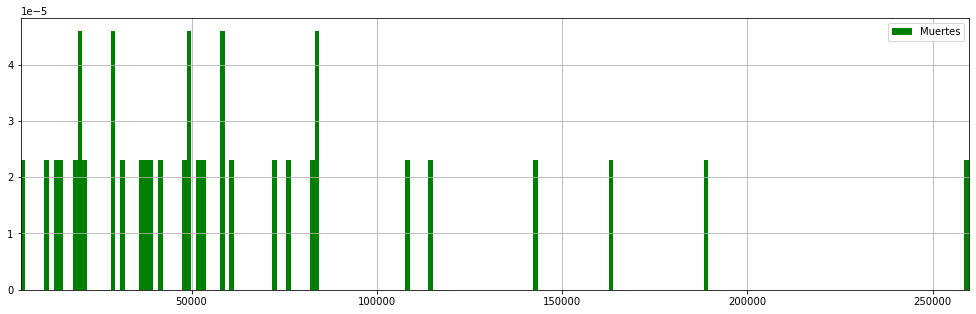

In [19]:
morts = pd.DataFrame({'Numero muertes': mort.iloc[1:,3]})
list_acc_m=list(mort.iloc[1:,3])
xmort=list(filter(lambda num: num != 0, list_acc_m))

bins=200
plt.figure(figsize=(17,5))
plt.hist(xmort, bins, density= True, label= "Muertes", color='green')
plt.xlim((min(list_acc_m)-20,max(list_acc_m)+20))
plt.legend(loc="best")
plt.grid()
plt.show()

## DISTRIBUCIÓN PARA MORTALIDAD

In [20]:
dist_mort,para_mort=best_fit_distribution(mort.iloc[1:,3])
dist_mort,para_mort

('exponnorm', (8.881605118379046, 9933.453558164236, 6079.0038559897885))

Tenemos que el mejor ajuste para nuestros datos es una distribución EXPONNORM con los parametros dentro de la vriable "para_mort"

## PRUEBA QUANTIL QUANTIL

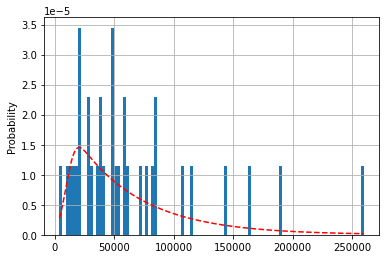

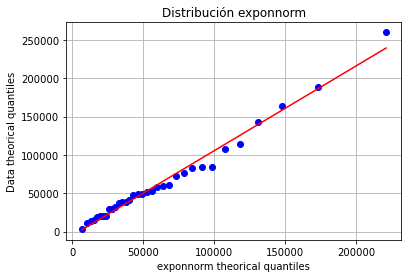

In [21]:
# Histograma de las variables creadas
divisiones = 100 # Cantidad de barras en el histograma
plt.hist(mort.iloc[1:,3], divisiones, density=True,label='Mortalidad')
x = np.arange(min(mort.iloc[1:,3]),max(mort.iloc[1:,3]),.01)
y = st.exponnorm.pdf(x, para_mort[0], para_mort[1],para_mort[2])
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

# Gráfica de Q-Q entre las muestras creadas y una curva exponnorm
st.probplot(mort.iloc[1:,3], (para_mort[0], para_mort[1],para_mort[2]), dist=dist_mort, plot=plt)
plt.grid()
plt.title('Distribución exponnorm')
plt.xlabel('exponnorm theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

## KDE

Empleamos Kernel Density Estimation para seleccionar el bandwidth que mejor se ajuste a nuestros datos. 

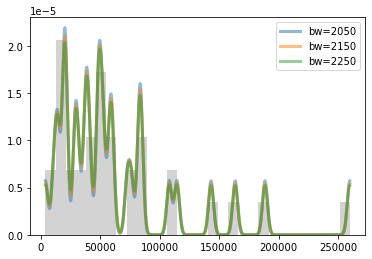

In [22]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

x_grid = np.linspace(min(mort.iloc[1:,3]),max(mort.iloc[1:,3]), 1000)

fig, ax = plt.subplots()
for bandwidth in [2050,2150,2250]:
    ax.plot(x_grid, kde_sklearn(mort.iloc[1:,3], x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.5)
ax.hist(mort.iloc[1:,3], 30, fc='lightgray', histtype='stepfilled', alpha=1, density=True)
ax.legend(loc='upper right')

Tomamos el $bw=2250$ ya que vemos que es el que mejor se ajusta

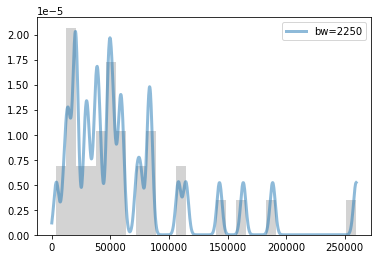

In [28]:
#Variable aleatorias y aceptación y rechazo
fig, ax = plt.subplots()
ax.plot(x_grid, kde_sklearn(mort.iloc[1:,3], x_grid, bandwidth= 2250),
        label='bw=2250'.format(bandwidth), linewidth=3, alpha=0.5)
ax.hist(mort.iloc[1:,3], 30, fc='lightgrey', histtype='stepfilled', alpha=1, density=True)
ax.legend(loc='upper right')
plt.show()

## MÉTODO DE ACEPTACIÓN Y RECHAZO CON KDE

In [30]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    pdf = lambda x: np.exp(kde_skl.score_samples(x[:, np.newaxis]))
    return pdf


# Función objetivo 
x_grid = np.linspace(0, mort.iloc[1:,3].max(), 1000) #max data manejada
data = np.asarray(mort.iloc[1:,3]) #data 
f = kde_sklearn(data, x_grid, bandwidth=2250) # bw data nodo
# Máximo de la función f
max_f = max(f(x))
print('El máximo de f es:',max_f)

El máximo de f es: 2.032743875318245e-05


Evidentemente, con las graficas anteriores podemos observar que el $bw=2250$ fue es óptimo ya que se ajusta muy bien a nuestros datos

In [ ]:
# Función t
t = lambda x: max_f*np.ones(len(x))
x = np.arange(0,mort.iloc[1:,3].max(),0.01)  # Rango donde se graficará las funciones
# Gráficas de las funciones
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend(loc='upper right')
# # Validación del método
N = 10000 # número de puntos a simular
R2 = np.random.rand(N)
R1 = np.random.uniform(0,mort.iloc[1:,3].max(),N) #maximo de todos los tados. 
Acep_rechazo(R2,R1,f,t)

## CHI CUADRADA

## Prueba chi cuadrada

**Para los datos totales de suicidio**


$H_0$: EXPONNORM es la distribución de los valores 

$H_a$: EXPONNORM no es la distribución de los valores 

In [ ]:
J = 60  # Cantidad de particiones del histograma
[freq,x,p]=plt.hist(mort.iloc[1:,3],J,density=True, color='green')
plt.show()

# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x)
sigma = np.std(x)
print('media muestral =%f, desviación estándar muestral =%f'%(mu,sigma))
print('media real =%f, desviación real muestral =%f'%(mort.iloc[1:,3].mean(),mort.iloc[1:,3].std()))

In [ ]:
pi = st.exponnorm.pdf(x,para_mort[0], para_mort[1],para_mort[2])
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo usando la librería estadística de la chi cuadrada
X = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X)

# Cálculo de Grados de libertad del estadístico
p = 3 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est2 = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est2)
print('Media muestral = %f \nDesviación estándar muestral =%f '%(mu,sigma))
print('media real =%f, desviación real muestral =%f'%(mort.iloc[1:,3].mean(),mort.iloc[1:,3].std()))

Como podemos observar el $p value>0.05$ por lo tanto se acepta la $H_0$

## PRÓNOSTICO 2021

In [ ]:
mort_2021 = st.exponnorm.mean(para_mort[0], para_mort[1],para_mort[2]).round()
vsuic_2021= st.exponnorm.std(para_mort[0], para_mort[1],para_mort[2]).round()
print('Muertes pronosticados en promedio por estado para 2021 = ', mort_2021)


## CONCLUSIÓN NODO 2



En este nodo el objetivo era obtener el promedio de las muertes gracias a una distribución, dicho objetivo se cumplió gracias a las pruebas realizadas en este nodo. Como dije, se obtuvieron resultados gracias a la distrubución que se ajusta y ademas al kernel con le bw óptimo. Las resultados de las pruebas fueron aceptados con satisfacción.

# <span style="background-color: purple">NODO CAUSAS SUICIDIO</span>


In [6]:
causas = pd.read_excel('Suicidios_Causas2.xlsx', sheet_name='Tabulado', header=None).dropna()
causas = causas.drop(columns=[2,3,5,6,8,9,11,12,14,15,17,18,20,21,23,24,26,27])
causas.columns=['Causas','2010','2011','2012','2013','2014','2015','2016','2017','2018']
causas.set_index('Causas', inplace=True)
causas['Total'] = causas.iloc[:,0:3].sum(axis=1)
# s_causa.head()
causas

,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
Causas,,,,,,,,,,
Total,5012,5718,5549,5909,6337,6425,6370,6559,6808,16279.0
"Ahorcamiento, estrangulamiento o sofocación",3847,4406,4291,4554,5000,5092,5145,5266,5486,12544.0
Disparo de arma de fuego,547,595,524,574,529,573,491,518,515,1666.0
Envenenamiento,460,523,508,556,577,512,517,517,506,1491.0
Otras causas,158,194,226,225,231,248,217,258,301,578.0


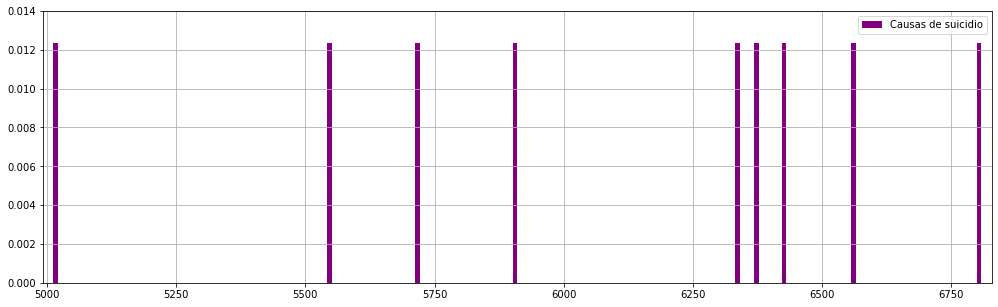

In [8]:
# cause = pd.DataFrame({'causas de suicidio': (causas['2010'].append(causas["2011"]).append(causas["2012"]).append(causas["2013"]).append\
#                                               (causas["2014"]).append(causas["2015"]).append(causas["2016"]).append(causas["2017"]))})
cause = pd.DataFrame({'causas de suicidio': (causas.iloc[0,:-1])})


list_acc_c=list(causas.iloc[0,:-1])
xcausas = list(filter(lambda num: num != 0, list_acc_c))

bins=200
plt.figure(figsize=(17,5))
plt.hist(xcausas, bins, density= True, label= "Causas de suicidio", color='purple')
plt.ylim(0,.014)
plt.xlim((min(list_acc_c)-20,max(list_acc_c)+20))
plt.legend(loc="best")
plt.grid()
plt.show()

## DISTRIBUCIÓN PARA CAUSA DE SUICIDIOS

In [39]:
dist_causas,para_causas=best_fit_distribution(suicidios.iloc[0,:-1])
dist_causas, para_causas

('expon', (6559.0, 304.33333333333303))

Tenemos que el mejor ajuste para nuestros datos es una distribución exponencial con los parametros dentro de la variable 'para_causas'.

## PRUEBA QUANTIL QUANTIL

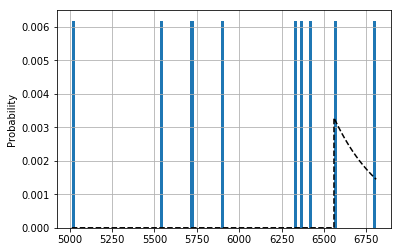

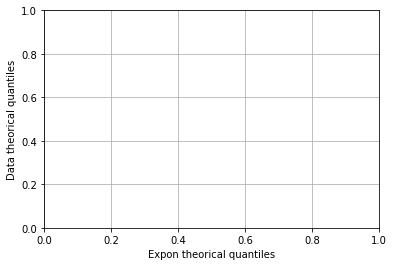

In [143]:
causastotal=causas.iloc[0,:-1].T.astype(int)
# Histograma de las variables creadas
divisiones = 100 # Cantidad de barras en el histograma
plt.hist(causastotal, divisiones, density=True,label='Causas')
x = np.arange(min(causastotal),max(causastotal),.01)
y3 = st.expon.pdf(x, para_causas[0], para_causas[1])
plt.plot(x, y3, 'k--')
plt.ylabel('Probability')
plt.grid()
plt.show()

# Gráfica de Q-Q entre las muestras creadas y una curva normal
st.probplot(causastotal, (para_causas[0],para_causas[1]), dist=dist_causas)
plt.grid()
plt.xlabel('Expon theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

## KERNEL

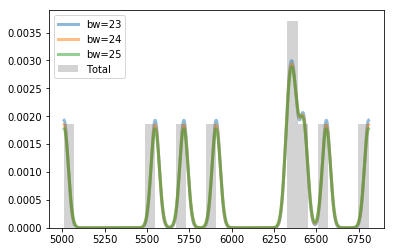

In [190]:
x_grid = np.linspace(min(causastotal),max(causastotal), 1000)

fig, ax = plt.subplots()
for bandwidth in [23,24,25]:
    ax.plot(x_grid, kde_sklearn(causastotal, x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.5)
ax.hist(causastotal, 30, fc='lightgray', histtype='stepfilled', alpha=1, density=True)
# ax.set_xlim(-4.5, 3.5)
ax.legend(loc='upper left')

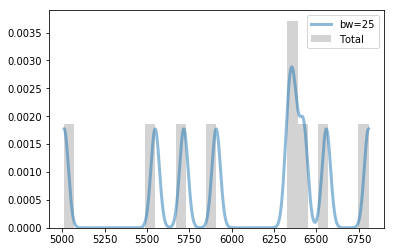

In [192]:
fig, ax = plt.subplots()
ax.plot(x_grid, kde_sklearn(causastotal, x_grid, bandwidth=25),
        label='bw=25'.format(bandwidth), linewidth=3, alpha=0.5)
ax.hist(causastotal, 30, fc='lightgrey', histtype='stepfilled', alpha=1, density=True)
ax.legend(loc='upper right')
plt.show()

In [193]:
def kde_sklearn2(x, x_grid, bandwidth=2.5, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    pdf = lambda x: np.exp(kde_skl.score_samples(x[:, np.newaxis]))
    return pdf

fx = kde_sklearn2(causastotal,x_grid)
fx

<function __main__.kde_sklearn2.<locals>.<lambda>(x)>

## CHI CUADRADA

## Prueba chi cuadrada

**Para los datos totales de causas de suicidio**


$H_0$: EXPON es la distribución de los valores 

$H_a$: EXPON no es la distribución de los valores 

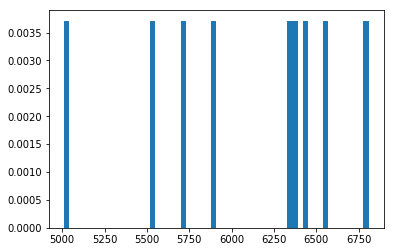

media muestral =5895.033333, desviación estándar muestral =518.388528
media real =6076.333333, desviación real muestral =0.000000


In [195]:
J = 60  # Cantidad de particiones del histograma
[freqs,xc,p]=plt.hist(causastotal,J,density=True)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
xc = xc[:-1] 

# Media y desviación estándar muestral
mus = np.mean(xc)
sigmas = np.std(xc)
print('media muestral =%f, desviación estándar muestral =%f'%(mus,sigmas))
print('media real =%f, desviación real muestral =%f'%(causas.iloc[0,:-1].mean(),causas.iloc[0,-1].std()))

In [196]:
pi = st.expon.pdf(xc,para_causas[0], para_causas[1])
# Cálculo de la esperanza usando la expresión teórica
Ei = xc*pi

# Cálculo usando la librería estadística de la chi cuadrada
Xc = st.chisquare(freqs,Ei)
print('Valor de chi cuadrado librería = ',Xc)

# Cálculo de Grados de libertad del estadístico
p = 3 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est2 = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est2)
print('Media muestral = %f \nDesviación estándar muestral =%f '%(mus,sigmas))

Valor de chi cuadrado librería =  Power_divergenceResult(statistic=nan, pvalue=nan)
Estadístico de chi_cuadrado =  74.46832415930936
Media muestral = 5895.033333 
Desviación estándar muestral =518.388528 


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:4567: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:4567: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


Como podemos observar el $p value<0.05$ por lo tanto se rechaza la $H_0$

# <span style="background-color: orange">NODO EDAD SUICIDIO</span>


In [2]:
edad = pd.read_excel('Suicidios_Edad.xlsx', sheet_name='Tabulado', header=None).dropna()
edad = edad.drop(columns=[2,3,5,6,8,9,11,12,14,15,17,18,20,21,23,24,26,27])
edad.columns=['Edad','2010','2011','2012','2013','2014','2015','2016','2017','2018']
edad.set_index('Edad', inplace=True)
edad['Total'] = edad.iloc[:,0:3].sum(axis=1)
edad

,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
Edad,,,,,,,,,,
Total,5012,5718,5549,5909,6337,6425,6370,6559,6808,16279.0
10 a 14 años,187,249,208,174,243,236,228,209,229,644.0
15 a 19 años,685,859,826,780,761,861,774,795,800,2370.0
20 a 24 años,761,916,877,875,1015,1010,1035,1027,1035,2554.0
25 a 29 años,608,716,662,748,758,788,816,868,890,1986.0
30 a 34 años,528,559,592,651,684,708,675,746,810,1679.0
35 a 39 años,549,521,535,574,649,653,628,652,690,1605.0
40 a 44 años,352,448,438,514,520,528,552,551,559,1238.0
45 a 49 años,320,346,332,405,419,421,414,428,472,998.0


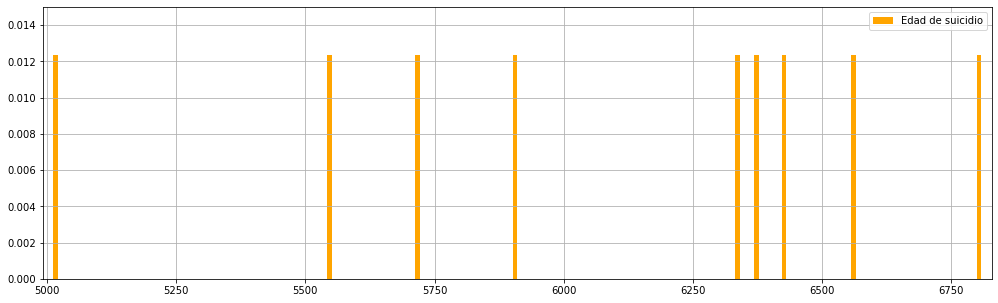

In [9]:
age = pd.DataFrame({'edad de suicidio': (edad.iloc[0,:-1])})

list_acc_c=list(edad.iloc[0,:-1])
xcausas = list(filter(lambda num: num != 0, list_acc_c))

bins=200
plt.figure(figsize=(17,5))
plt.hist(xcausas, bins, density= True, label= "Edad de suicidio", color='orange')
plt.ylim(0,.015)
plt.xlim((min(list_acc_c)-20,max(list_acc_c)+20))
plt.legend(loc="best")
plt.grid()
plt.show()

## DISTRIBUCIÓN PARA SUICIDIOS

In [153]:
dist_edad,para_edad=best_fit_distribution(edad.iloc[0,:-1])
dist_edad, para_edad

('uniform', (5012.0, 1796.0))

Tenemos que el mejor ajuste para nuestros datos es una distribución normal con los parametros media cero y varianza 1

## PRUEBA QUANTIL QUANTIL

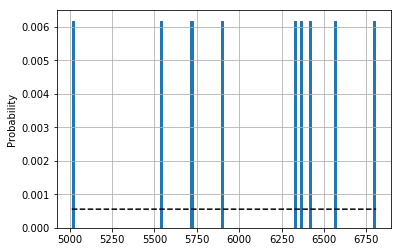

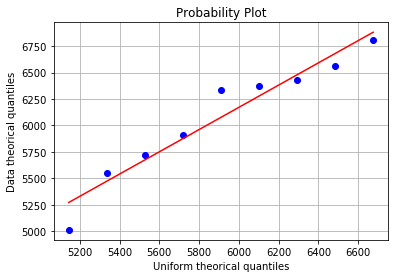

In [155]:
edadtotal=edad.iloc[0,:-1].T.astype(int)
# Histograma de las variables creadas
divisiones = 100 # Cantidad de barras en el histograma
plt.hist(edadtotal, divisiones, density=True,label='Edad')
x = np.arange(min(edadtotal),max(edadtotal),.01)
y4 = st.uniform.pdf(x, para_edad[0], para_edad[1])
plt.plot(x, y4, 'k--')
plt.ylabel('Probability')
plt.grid()
plt.show()

# Gráfica de Q-Q entre las muestras creadas y una curva normal
st.probplot(edadtotal, (para_edad[0],para_edad[1]), dist=dist_edad, plot=plt)
plt.grid()
plt.xlabel('Uniform theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

## KERNEL

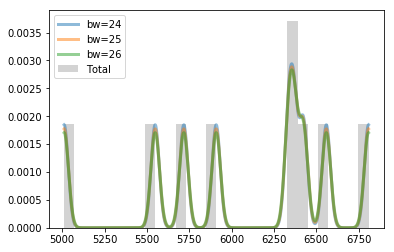

In [162]:
x_grid = np.linspace(min(edadtotal),max(edadtotal), 1000)

fig, ax = plt.subplots()
for bandwidth in [24,25,26]:
    ax.plot(x_grid, kde_sklearn(edadtotal, x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.5)
ax.hist(edadtotal, 30, fc='lightgray', histtype='stepfilled', alpha=1, density=True)
# ax.set_xlim(-4.5, 3.5)
ax.legend(loc='upper left')

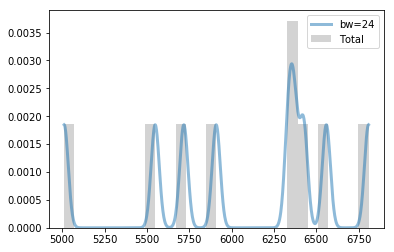

In [163]:
fig, ax = plt.subplots()
ax.plot(x_grid, kde_sklearn(edadtotal, x_grid, bandwidth=24),
        label='bw=24'.format(bandwidth), linewidth=3, alpha=0.5)
ax.hist(edadtotal, 30, fc='lightgrey', histtype='stepfilled', alpha=1, density=True)
ax.legend(loc='upper right')
plt.show()

In [164]:
def kde_sklearn2(x, x_grid, bandwidth=2.5, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    pdf = lambda x: np.exp(kde_skl.score_samples(x[:, np.newaxis]))
    return pdf

fx = kde_sklearn2(edadtotal,x_grid)
fx

<function __main__.kde_sklearn2.<locals>.<lambda>(x)>

## CHI CUADRADA

## Prueba chi cuadrada

**Para los datos totales de suicidio**


$H_0$: UNIFORM es la distribución de los valores 

$H_a$: UNIFORM no es la distribución de los valores 

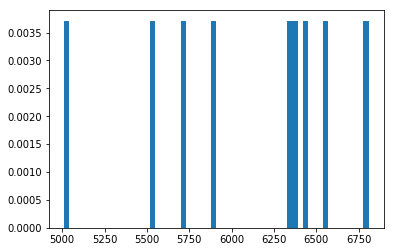

media muestral =5895.033333, desviación estándar muestral =518.388528
media real =6076.333333, desviación real muestral =571.330465


In [185]:
J = 60  # Cantidad de particiones del histograma
[freqs,xc,p]=plt.hist(edadtotal,J,density=True)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
xc = xc[:-1] 

# Media y desviación estándar muestral
mus = np.mean(xc)
sigmas = np.std(xc)
print('media muestral =%f, desviación estándar muestral =%f'%(mus,sigmas))
print('media real =%f, desviación real muestral =%f'%(edadtotal.mean(),edadtotal.std()))

In [186]:
pi = st.expon.pdf(xc,para_edad[0], para_edad[1])
# Cálculo de la esperanza usando la expresión teórica
Ei = xc*pi

# Cálculo usando la librería estadística de la chi cuadrada
Xc = st.chisquare(freqs,Ei)
print('Valor de chi cuadrado librería = ',Xc)

# Cálculo de Grados de libertad del estadístico
p = 3 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est2 = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est2)
print('Media muestral = %f \nDesviación estándar muestral =%f '%(mus,sigmas))

Valor de chi cuadrado librería =  Power_divergenceResult(statistic=122.32833115169882, pvalue=2.5147167155829497e-06)
Estadístico de chi_cuadrado =  74.46832415930936
Media muestral = 5895.033333 
Desviación estándar muestral =518.388528 


Como podemos observar el $p value<0.05$ por lo tanto se rechaza la $H_0$

In [1]:
# Importamos librerías 
from functools import reduce
import time
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline
#Para Kernel
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

import scipy.stats as st
from scipy import optimize as opt

from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

import warnings
from scipy.stats import gaussian_kde

import seaborn as sns

import math

from scipy.stats import mielke


In [3]:
def kde_scipy_f(x, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return lambda x: kde.evaluate(x)

def kde_sklearn_f(x, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = lambda x_grid: np.exp(kde_skl.score_samples(x_grid[:, np.newaxis]))
    return log_pdf

def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)


def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)
    
    
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(x_grid)


def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)


kde_funcs = [kde_statsmodels_u, kde_statsmodels_m, kde_scipy, kde_sklearn]
kde_funcnames = ['Statsmodels-U', 'Statsmodels-M', 'Scipy', 'Scikit-learn']

print( "Package Versions:")
import sklearn; print( "  scikit-learn:", sklearn.__version__)
import scipy; print ("  scipy:", scipy.__version__)
import statsmodels; print( "  statsmodels:", statsmodels.__version__)







functions = dict(zip(kde_funcnames, kde_funcs))


def plot_scaling(N=1000, bandwidth=0.1, rtol=0.0,
                 Nreps=3, kwds=None, xgrid=None):
    """
    Plot the time scaling of KDE algorithms.
    Either N, bandwidth, or rtol should be a 1D array.
    """
    if xgrid is None:
        xgrid = np.linspace(-10, 10, 5000)
    if kwds is None:
        kwds=dict()
    for name in functions:
        if name not in kwds:
            kwds[name] = {}
    times = defaultdict(list)
    
    B = np.broadcast(N, bandwidth, rtol)
    assert len(B.shape) == 1
    
    for N_i, bw_i, rtol_i in B:
        x = np.random.normal(size=int(N_i))
        kwds['Scikit-learn']['rtol'] = rtol_i
        for name, func in functions.items():
            t = 0.0
            for i in range(Nreps):
                t0 = time()
                func(x, xgrid, bw_i, **kwds[name])
                t1 = time()
                t += (t1 - t0)
            times[name].append(t / Nreps)
            
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    plot_kwds={'linewidth':3, 'alpha':0.5}
    
    if np.size(N) > 1:
        for name in kde_funcnames:
            ax.loglog(N, times[name], label=name, **plot_kwds)
        ax.set_xlabel('Number of points')
    elif np.size(bandwidth) > 1:
        for name in kde_funcnames:
            ax.loglog(bandwidth, times[name], label=name, **plot_kwds)
        ax.set_xlabel('Bandwidth')
    elif np.size(rtol) > 1:
        for name in kde_funcnames:
            ax.loglog(rtol, times[name], label=name, **plot_kwds)
        ax.set_xlabel('Relative Tolerance')
        
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')
    ax.legend(loc=0)
    ax.set_ylabel('time (seconds)')
    ax.set_title('Execution time for KDE '
                 '({0} evaluations)'.format(len(xgrid)))
    
    return times


def plot_scaling_vs_kernel(kernels, N=1000, bandwidth=0.1, rtol=0.0,
                           Nreps=3, kwds=None, xgrid=None):
    """
    Plot the time scaling for Scikit-learn kernels.
    Either N, bandwidth, or rtol should be a 1D array.
    """
    if xgrid is None:
        xgrid = np.linspace(-10, 10, 5000)
    if kwds is None:
        kwds=dict()
    times = defaultdict(list)
    
    B = np.broadcast(N, bandwidth, rtol)
    assert len(B.shape) == 1
    
    for N_i, bw_i, rtol_i in B:
        x = np.random.normal(size=int(N_i))
        for kernel in kernels:
            kwds['kernel'] = kernel
            kwds['rtol'] = rtol_i
            t = 0.0
            for i in range(Nreps):
                t0 = time()
                kde_sklearn(x, xgrid, bw_i, **kwds)
                t1 = time()
                t += (t1 - t0)
            times[kernel].append(t / Nreps)
            
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    plot_kwds={'linewidth':3, 'alpha':0.5}
    
    if np.size(N) > 1:
        for kernel in kernels:
            ax.loglog(N, times[kernel], label=kernel, **plot_kwds)
        ax.set_xlabel('Number of points')
    elif np.size(bandwidth) > 1:
        for kernel in kernels:
            ax.loglog(bandwidth, times[kernel], label=kernel, **plot_kwds)
        ax.set_xlabel('Bandwidth')
    elif np.size(rtol) > 1:
        for kernel in kernels:
            ax.loglog(rtol, times[kernel], label=kernel, **plot_kwds)
        ax.set_xlabel('Relative Tolerance')
        
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')
    ax.legend(loc=0)
    ax.set_ylabel('time (seconds)')
    ax.set_title('Execution time for KDE '
                 '({0} evaluations)'.format(len(xgrid)))
    
    return times


def plot_kernels():
    """Visualize the KDE kernels available in Scikit-learn"""
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')

    X_src = np.zeros((1, 1))
    x_grid = np.linspace(-3, 3, 1000)

    for kernel in ['gaussian', 'tophat', 'epanechnikov',
                   'exponential', 'linear', 'cosine']:
        log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(x_grid[:, None])
        ax.plot(x_grid, np.exp(log_dens), lw=3, alpha=0.5, label=kernel)
    ax.set_ylim(0, 1.05)
    ax.set_xlim(-2.9, 2.9)
    ax.legend()
    
    
    
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1) #Evalua f en el vector R1
    t_x = t(R1) #Evalua t en el vector R1
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
    
    
# Definimos la función para que nos diga el porcentaje de aceptadas en ambos casos
def histograma(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1) #Evalua f en el vector R1
    t_x = t(R1) #Evalua t en el vector R1
    condition = R2*t_x <=f_x
    barras = [R1[i] for i in range(len(R1)) if condition[i]]
    plt.hist(barras,50,density=True)
    plt.xlabel('valores aleatorios')
    plt.ylabel('probabilidad')
    plt.title('histograma función creada')
    plt.show()
    return

Package Versions:
  scikit-learn: 0.23.1
  scipy: 1.5.0
  statsmodels: 0.11.1
